<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwe.png" width=300>
<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwecyber_acecse_200.jpg" width=300>

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Task 1: Network Traffic Analysis (2021)
---

The completion of this worksheet is worth **10%** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Task
---

You have been asked to examine a sample of network traffic to investigate suspicious activity on some of the company workstations. The company directors need to be able to understand this data. 

Your task is to produce a series of different visual representations to describe and understand the characteristics of the data. As a bare minimum, you should show at least 1 line chart, 1 bar chart, and 1 scatter plot. For each chart, you need to decide what data is useful for the chart representation, and how you can manipulate the raw data appropriately for this. You should then also provide a brief caption for each chart that describes what data is used, what the data shows, and what insight this may provide for furthering this investigation. The examples given below should help steer you to decide what charts would be appropriate - you may also explore other data for your charts where informative also.

### Assessment and Marking
---

Marks will be awarded for the following: 

| | 0 | 50 | 100 |
| --- | --- | --- | --- | 
| **Line chart (20%)** | No line chart presented or major errors in the method used | Chart is visible using provided data, but some minor errors | Line chart that depicts the number of packets sent on the network per minute |
| **Bar chart (20%)**  | No bar chart presented or major errors in the method used | Chart is visible using provided data, but some minor errors | Bar chart that depicts the volume of activity for each observed protocol |
| **Scatter plot (20%)**  | No scatter plot presented or major errors in the method used | Chart is visible using provided data, but some minor errors | Scatter plot that depicts the source/destination IP pairs |
| **Markdown (40%)**  | No markdown presented or major errors in the method used | Some limited use of Markdown | All charts are clearly described using Markdown notation |

You will need to implement your final solution in the Notebook format, with Markdown annotation -  you should use this notebook file as a template for your submission. You are also expected to complete the assignment self-assessment.

Your submission should include:
- HTML export of your complete assignment in notebook format.
- Original ipynb source file of your notebook.

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.

- **Line chart (20%)**: You estimate that your grade will be 100.

- **Bar chart (20%)**: You estimate that your grade will be 100.

- **Scatter plot (20%)**: You estimate that your grade will be 100.

- **Markdown (40%)**: You estimate that your grade will be 100.

Please provide a minimum of two sentences to comment and reflect on your own self-assessment:

*All plots display the data I intended them to clearly and correctly. I have also gone through additional steps to make each plot as easy to read as possible. For example, I set the x and y axis labels based on what they represent and gave each plot an appropriate title.*

*I have also used markup extensively to explain what my code does, and to provide titles in order to easily navigate the notebook.*

In [132]:
### Load in the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_data():
    data = pd.read_csv('./T1_data/T1_data.csv')
    return data

data = load_csv_data()
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,01:05:49.468757,172.16.1.4,172.16.1.255,BROWSER,243,"Host Announcement CARLFORCE-DC1, Workstation, ..."
1,2,01:05:50.279222,172.16.1.4,172.16.1.255,BROWSER,243,"Host Announcement CARLFORCE-DC1, Workstation, ..."
2,3,01:06:10.328524,172.16.1.201,224.0.0.252,LLMNR,66,Standard query 0x229b A isatap
3,4,01:06:10.390913,172.16.1.201,172.16.1.4,DNS,76,Standard query 0x6ef6 A www.msftncsi.com
4,5,01:06:10.391325,172.16.1.201,172.16.1.4,DNS,76,Standard query 0x6ef6 A www.msftncsi.com
...,...,...,...,...,...,...,...
8154,8155,01:43:36.828784,172.16.1.141,174.127.99.158,TCP,66,[TCP Retransmission] 49211 > 2017 [SYN] Seq=...
8155,8156,01:43:36.946258,174.127.99.158,172.16.1.141,TCP,54,"2017 > 49211 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"
8156,8157,01:43:37.452810,172.16.1.141,174.127.99.158,TCP,62,[TCP Retransmission] 49211 > 2017 [SYN] Seq=...
8157,8158,01:43:37.563033,174.127.99.158,172.16.1.141,TCP,54,"2017 > 49211 [RST, ACK] Seq=1 Ack=1 Win=0 Len=0"


### Pre-processing and Preparation
##### Before creating visualisations, the data should first be checked and formatted to make sure it is in a suitable format to visualise.

Looking at the columns, it is realised that there are a number of different fields which are not necessary. Firstly, it is clear the 'No.' field is not needed as the dataframe already has an index.

The 'Length' column shows what is thought to be unuseful data for this analysis, and as it will not be used this may also be dropped.

Finally, the 'Info' column similarly shows data that is not going to be used and so that should be dropped as well.

In [133]:
#Drop the 'No.', 'Length' and 'Info' columns from the dataset
data = data.drop(columns=['No.','Length','Info'])

Now that we have dropped the columns that are considered to unnecessary, the column types should be checked to ensure they are suitable.

In [134]:
#Check the data type of each remaining column in the dataset
data.dtypes

Time           object
Source         object
Destination    object
Protocol       object
dtype: object

It's clear the 'Time' is not a datetime as it should be. Since this is unsuitable, it would be best converted to a Pandas 'datetime' data type so that it is easier to work with.
It can also be seen that the hour does not change, and the seconds and milliseconds are not likely to be needed.
Therefor we only want the minutes, and so we will convert the minutes to a column of type integer.

In [135]:
#Before doing this however, the dataframe value ranges will also be checked.
print(data.head(1))
print(data.tail(1))

              Time      Source   Destination Protocol
0  01:05:49.468757  172.16.1.4  172.16.1.255  BROWSER
                 Time        Source     Destination Protocol
8158  01:43:38.578617  172.16.1.141  174.127.99.158      TCP


It can also be seen that the 'Time' column is counting millisects which is not necessary. The hour also does not change, and so this is unlikely to be of any use. For the purposes of this analysis, the seconds are also unlikely to be needed and so this column should be converted to a 'datetime' type only details the minutes.

In [136]:
#Convert the 'Time' column to a datetime, retaining only the minutes
data['Time'] = pd.DatetimeIndex(data['Time']).minute

#Finally to check the time column is now in a good format, it can be checked with
print(data['Time'].head(5))

0    5
1    5
2    6
3    6
4    6
Name: Time, dtype: int64


The dataset is now in a good format, and the final thing to check is if there are any missing values which might need dealing with.

In [137]:
data.isnull().values.any()

False

We can see there are no missing values, and so the dataset is ready to work with.

As an additional step, the HTML formatting will be changed in order to make each plot central (as Jupyter by default draws output visualisations from the page margin).

In [138]:
from IPython.core.display import HTML
#Change the style to align output images to the center
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## 1. Line Chart

### Explanation
For first exploring the data, it is thought that viewing packets sent over time might would be a good start.
Therefore the sum of packets (dataset entries) over time will be viewed grouped by minute.

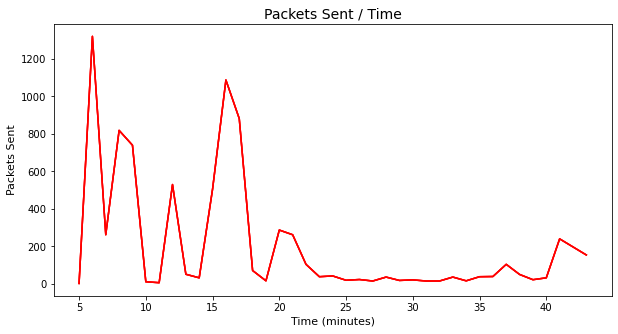

In [139]:
#First create a copy of the 'data' dataframe to be modified for the line chart
linePlotData = data

#Set its index to the 'Time' column
linePlotData.set_index('Time', inplace=True)

#Group the rows by 'Time'count and then plot
linePlotData = linePlotData.groupby(linePlotData.index).count().plot(kind='line', color='Red', legend=False, figsize=(10, 5))

#Finally set the labels
plt.title("Packets Sent / Time",fontsize=14)
plt.xlabel("Time (minutes)",fontsize=11)
plt.ylabel("Packets Sent",fontsize=11)

plt.show();

### *Analysis*
It's very clear from the line chart that there was a big spike in activity between minute 6 and minute 20. This may indicate a potential security issue, however it could also simply be a result of a normal operation such as creating backups which are transferred on a different system.

To analyse this activity further, let's see what sort of packets have been sent.

## 2. Bar Chart

### Explanation
Since there is potentially valuable information that may be learned from knowing what types of packets were sent, a bar chart will be created to help visualise what sort of traffic there was on the network.

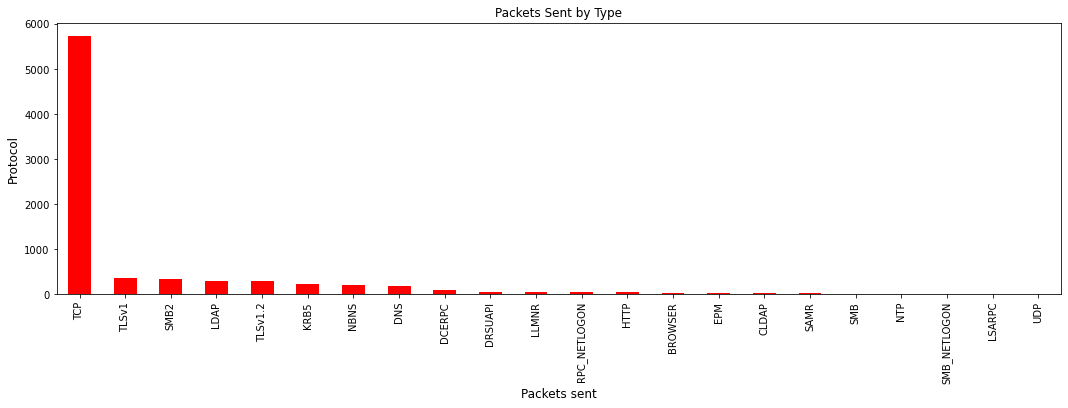

In [140]:
#Separate the dataset
barData = [data['Protocol']]
headers = ['Protocol']
barData = pd.concat(barData, axis=1, keys=headers)

#Now plot the data
barData['Protocol'].value_counts().plot(kind='bar', title='Packets Sent by Type', color='Red', figsize=(18, 5))

#Set appropriate x and y labels
plt.xlabel("Packets sent",fontsize=12)
plt.ylabel("Protocol",fontsize=12)

plt.show();

### *Analysis*
It's clear from this that a great number more of TCP packets were sent in comparison to other types. This is perhaps not very surprising due to the commonality of TCP packets, and it would support the previous suggestion that this might not necessarily be a sign of malicious activity.

As mentioned the spike of activity could be the creation of backups, which is likely to be done via FTP which utilises TCP.

## 3. Scatter Chart

### Explanation
Another way to analyse the traffic further would be to use a scatterplot. By making a scatterplot of where packets were sent from and their destination, it would be possible to flag up potential computers on the network of interest.

As a third dimension to visualise, the alpha value of each point will be decreased so that its intensity reflects the number of packets sent/received.

This would also be a good way to further test the backup hypothesis, as it would be expected for all packets to go to a single address (where the backups would likely be stored).

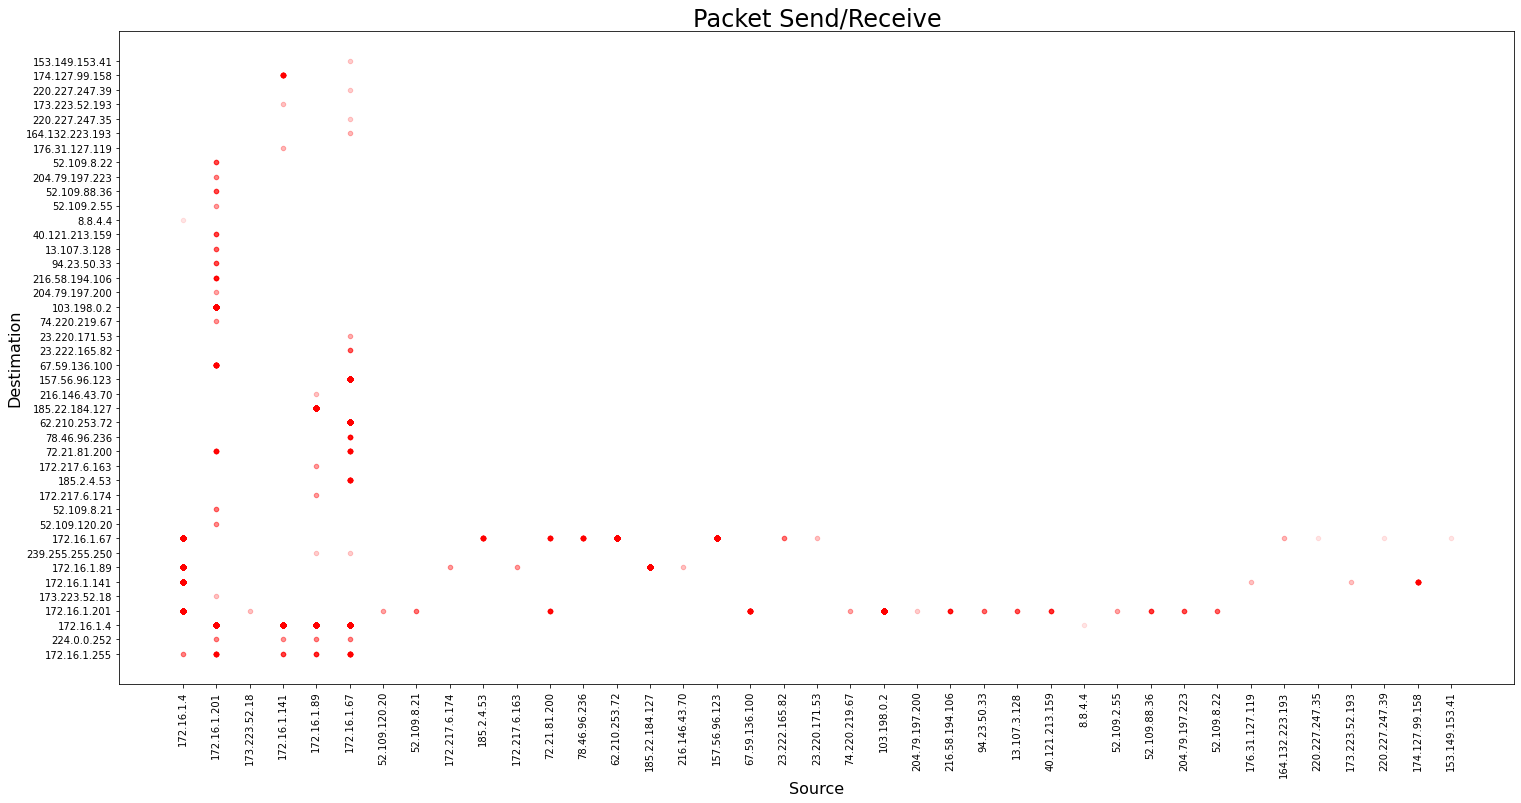

In [141]:
#Separate the dataset
scatterData = [data['Source'], data['Destination']]
headers = ['Source', 'Destination']
scatterData = pd.concat(scatterData, axis=1, keys=headers)

#Create the plot with appropriate labels and customisation
scatterData.plot(x='Source', y='Destination', kind='scatter', alpha=.05, color='Red', figsize=(25, 12))

#Set the labels
plt.title("Packet Send/Receive",fontsize=24)
plt.ylabel("Destimation",fontsize=16)
plt.xlabel("Source",fontsize=16)

#Make the chart more readable by rotating x ticks by 45 degrees (addresses are too long to display horizontally)
plt.xticks(rotation=90)

#Finally print. By using this the return output from specifying xticks will be hidden
plt.show();

### *Analysis*
It can be seen that the system with the address '172.16.201' sent a large number of packets to a large number of other destinations on the network. The address '172.16.89', and '172.16.67' also sent a lot of traffic, and this would appear to be around the time period the spike of activity was previously realised (this can be seen due to 'Time' being set as the index in the dataframe, and so earlier traffic can be seen on the left).

This does not support the thought that this spike in activity might be a cause of innocent activity, and it would seem necessary to investigate this event further.

# Conclusion
From the dataset, visualisations and analysis it can seen that there was a suspicious period of activity between 1:06 and 1:20am. This traffic spike was primarily comprised of TCP packets, originating mostly from the addresses '172.16.201', '172.16.89', and '172.16.67' to many other systems on the network.